In [2]:
# import dependencies
from pathlib import Path
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np

In [3]:
# create and reference a path
vg_csv = Path("Resources/vg_sales_updated.csv")
# Import and read as df
vg_df = pd.read_csv(vg_csv, encoding="ISO-8859-1")
vg_df.head()

,rank,game_title,platform,year,genre,publisher,developer,critic_score,user_score,north_america,europe,japan,rest_of_world,global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
4,5,PokÃ©mon Red / Green / Blue Version,GB,1998,Role-Playing,Nintendo,Game Freak,9.4,NaN,11.27,8.89,10.22,1.00,31.37


In [5]:
vg_df.dtypes

rank               int64
game_title        object
platform          object
year               int64
genre             object
publisher         object
developer         object
critic_score     float64
user_score       float64
north_america    float64
europe           float64
japan            float64
rest_of_world    float64
global           float64
dtype: object

In [6]:
vg_publisher_count = vg_df["publisher"].value_counts().reset_index()
vg_publisher_t10 = vg_publisher_count.head(10)
vg_developer_count = vg_df["developer"].value_counts().reset_index()
vg_developer_t10 = vg_developer_count.head(10)
vg_platform_count =vg_df["platform"].value_counts().reset_index()
vg_platform_t10 = vg_platform_count.head(10)
print(vg_publisher_t10)
print("-"*45)
print(vg_developer_t10)
print("-"*45)
print(vg_platform_t10)


                     publisher  count
0              Electronic Arts    322
1                     Nintendo    243
2  Sony Computer Entertainment    138
3                   Activision    118
4                   Nintendo      102
5                          THQ     90
6                      Ubisoft     82
7                         Sega     81
8         Take-Two Interactive     65
9                       Capcom     60
---------------------------------------------
           developer  count
0          EA Canada     63
1       Nintendo EAD     57
2             Capcom     49
3         EA Tiburon     48
4  Traveller's Tales     41
5     Nintendo EAD       40
6              Namco     28
7   Ubisoft Montreal     27
8  Vicarious Visions     26
9         Sonic Team     25
---------------------------------------------
  platform  count
0      PS2    378
1       PS    228
2     X360    222
3      PS3    211
4      Wii    163
5       DS    160
6       PC     96
7      GBA     78
8       XB     72
9 

In [7]:
# sort by year, chronological bins by decade
# 2020 games are include in the 10s
vg_sort_year = vg_df.sort_values(by='year')
bin_edges = [1980,1990,2000,2010,2020]
bin_labels = ['80s','90s','00s','10s']
vg_sort_year["Decade"] = pd.cut(vg_sort_year['year'], bins=bin_edges, labels=bin_labels)
vg_decade_count = vg_sort_year["Decade"].value_counts().reset_index()
vg_decade_count.columns = ['Decade','Count']
vg_decade_count['Decade'] = pd.Categorical(vg_decade_count['Decade'], categories=bin_labels, ordered=True)
vg_decade_count = vg_decade_count.sort_values(by='Decade')
vg_decade_count

,Decade,Count
3,80s,75
1,90s,422
0,00s,1303
2,10s,245


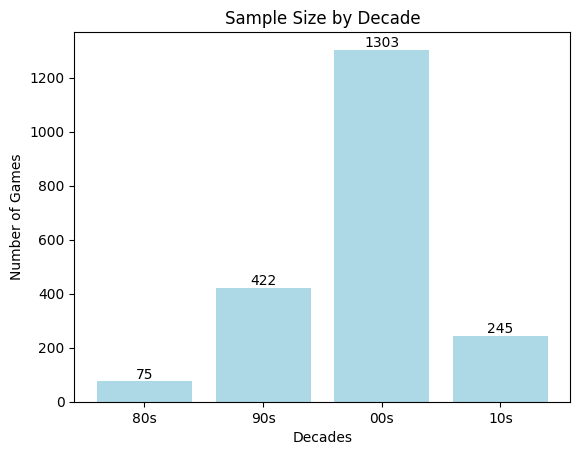

In [22]:
# bar chart sample size by decade
plt.bar(vg_decade_count['Decade'], vg_decade_count['Count'], color='lightblue', align='center')
plt.xlabel('Decades')
plt.ylabel('Number of Games')
plt.title('Sample Size by Decade')
# adding numbers to top of each bar to really cement the reality
count = vg_decade_count['Count']
for index, value in enumerate(count):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

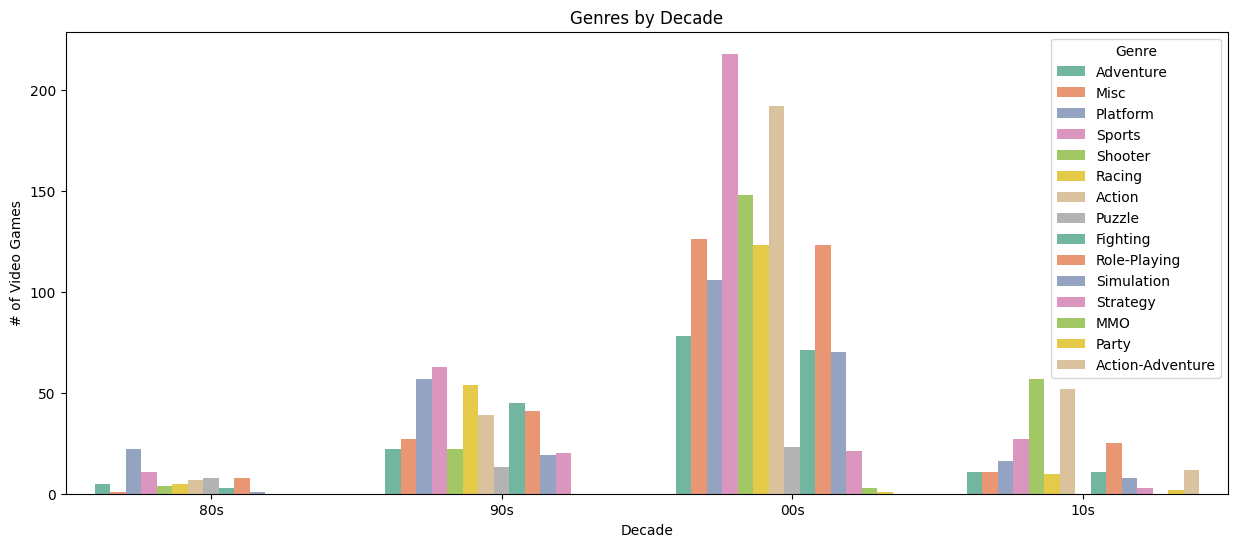

In [30]:
# bar chart, # of games produced for each decade bin
plt.figure(figsize=(15, 6))
sea.countplot(x='Decade', hue='genre', data=vg_sort_year, palette='Set2')
plt.title('Genres by Decade')
plt.xlabel('Decade')
plt.ylabel('# of Video Games')
plt.legend(title='Genre')
plt.show()

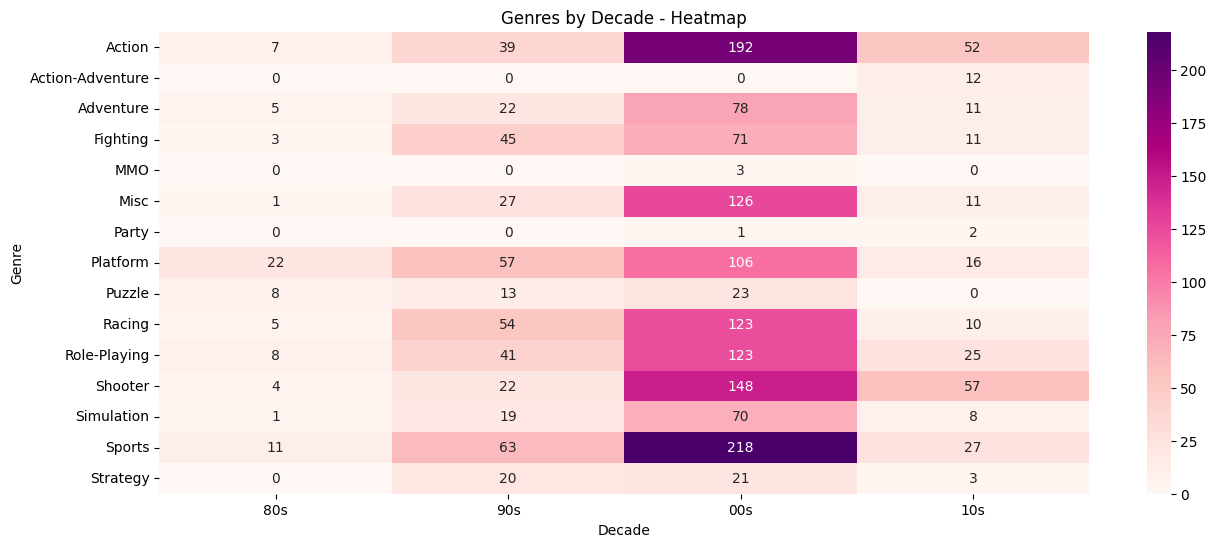

In [10]:
# heatmap because numbers, aligns with barchart1 showing # of games for each genre
pivot_table = vg_sort_year.pivot_table(index='genre', columns='Decade', aggfunc='size', fill_value=0)
plt.figure(figsize=(15, 6))
sea.heatmap(pivot_table, cmap='RdPu', annot=True, fmt='d')
plt.title('Genres by Decade - Heatmap')
plt.xlabel('Decade')
plt.ylabel('Genre')
plt.show()

In [120]:
# let's do a summary of popular platforms through the ages
# sort by year, chronological bins by decade
vg_sort_year = vg_df.sort_values(by='year')
bin_edges = [1980,1990,2000,2010,2020]
bin_labels = ['80s','90s','00s','10s']
vg_sort_year["Decade"] = pd.cut(vg_sort_year['year'], bins=bin_edges, labels=bin_labels)
vg_sort_platform = vg_sort_year.groupby(['Decade','platform'])['platform'].count().reset_index(name='Count')
popular_platforms = vg_sort_platform.loc[vg_sort_platform.groupby('Decade')['Count'].idxmax()]
print(popular_platforms)

   Decade platform  Count
9     80s      NES     58
38    90s       PS    213
65    00s      PS2    362
92    10s      PS3     63


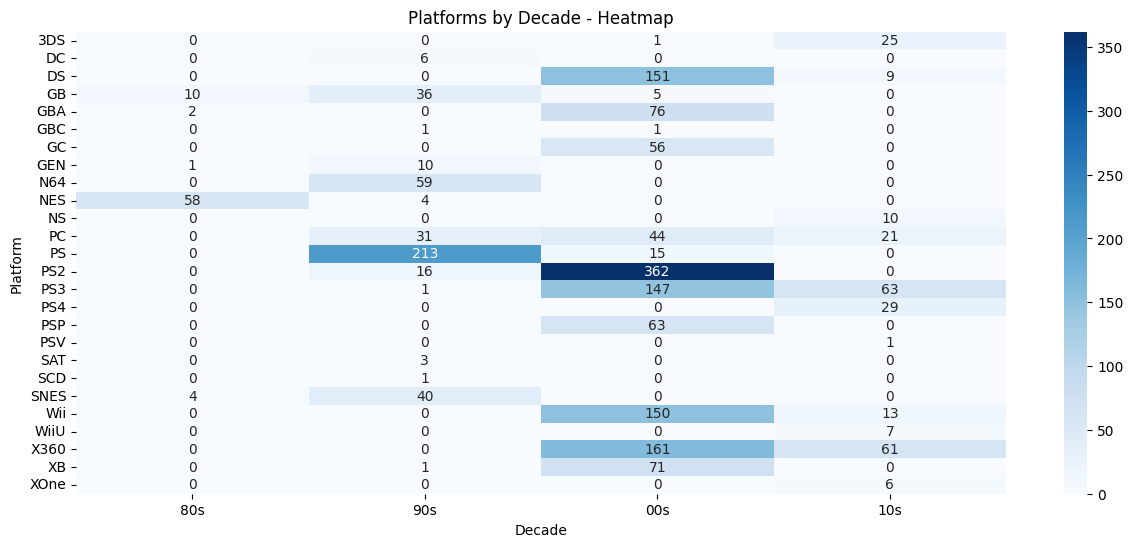

In [25]:
# trying to create a pivot table that shows platforms by decade heatmap
pivot_table = vg_sort_year.pivot_table(index='platform', columns='Decade', aggfunc='size', fill_value=0)
plt.figure(figsize=(15, 6))
sea.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Platforms by Decade - Heatmap')
plt.xlabel('Decade')
plt.ylabel('Platform')
plt.show()